In [1]:
import matplotlib.pyplot as plt 
import networkx as nx 
import numpy as np 
import itertools as it

In [18]:
G = nx.hexagonal_lattice_graph(2,2, periodic=0)
pos = nx.get_node_attributes(G, 'pos')

In [19]:
node_labels = np.array(G.nodes)

In [4]:
node_labels[b_idx]

NameError: name 'b_idx' is not defined

In [ ]:
mask = node_labels[b_idx][:, 0] == node_labels[b_idx][:, 1]
mask = np.logical_not(mask)

node_labels[b_idx][mask]

array([[0, 2],
       [0, 4],
       [1, 3],
       [1, 5],
       [2, 4]])

[(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (1, 5), (2, 2), (2, 4)]

In [ ]:
np.unique(unique)

array([0, 1, 2, 3, 4, 5])

In [20]:
n_nodes = len(G.nodes)

color = []

for i in range(16):
    if i % 2 == 0:
        color.append('b')
    else:
        color.append('r')

In [ ]:
pos

{(0, 0): (0.5, 0.0),
 (0, 1): (0.0, 0.8660254037844386),
 (0, 2): (0.5, 1.7320508075688772),
 (0, 3): (0.0, 2.598076211353316),
 (0, 4): (0.5, 3.4641016151377544),
 (1, 0): (1.5, 0.0),
 (1, 1): (2.0, 0.8660254037844386),
 (1, 2): (1.5, 1.7320508075688772),
 (1, 3): (2.0, 2.598076211353316),
 (1, 4): (1.5, 3.4641016151377544),
 (1, 5): (2.0, 4.330127018922193),
 (2, 1): (3.0, 0.8660254037844386),
 (2, 2): (3.5, 1.7320508075688772),
 (2, 3): (3.0, 2.598076211353316),
 (2, 4): (3.5, 3.4641016151377544),
 (2, 5): (3.0, 4.330127018922193)}

In [11]:
labels = {}

for i, node in enumerate(G.nodes):
    labels[node] = i

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

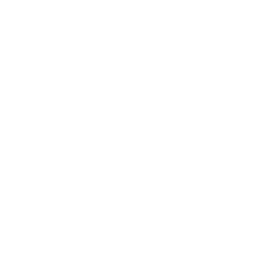

In [26]:
nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.axis('scaled')
plt.tight_layout()
plt.axis("off")

C:\Users\cosmi\AppData\Local\Temp/ipykernel_15052/2870490918.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(-0.36750000000000005,
 3.8674999999999997,
 -0.45466333698683026,
 4.784790355909022)

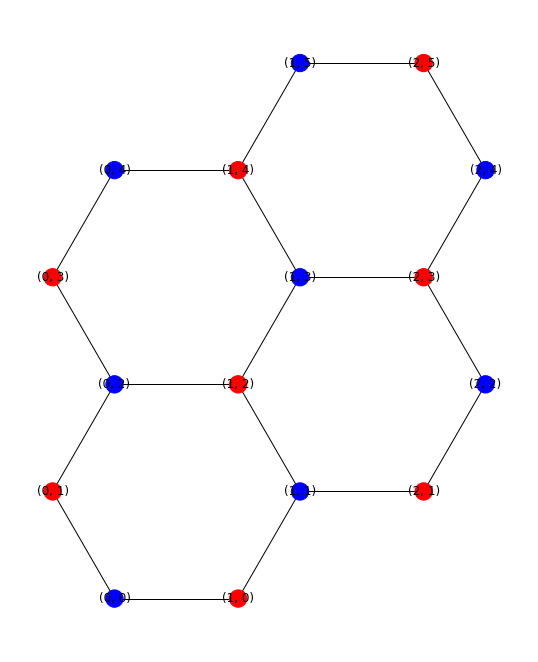

In [49]:
plt.figure(figsize=(16,9))
nx.draw(G, pos=pos, with_labels=True,  node_color=color)
plt.axis('scaled');
#nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.axis('scaled')
plt.tight_layout()
plt.axis("off")

In [39]:
NN_1 = nx.Graph()
NN_2 = nx.Graph()

pos1 = {}
pos2 = {}

nodes = list(G.nodes)

for i, node in enumerate(nodes):
    if i % 2 == 0:
        pos1[node] = pos[node]
        if i < 6:
            for j in range(2, 8, 2):
                try:
                    NN_1.add_edge(node, nodes[i + j])
                except:
                    pass
        else:
            for j in it.chain(range(-6, 0, 2), range(2, 8, 2)):
                try:
                    NN_1.add_edge(node, nodes[i + j])
                except:
                    pass
    else:
        pos2[node] = pos[node]
        if i < 6:
            for j in range(2, 8, 2):
                try:
                    NN_2.add_edge(node, nodes[i + j])
                except:
                    pass
        else:
            for j in it.chain(range(-6, 0, 2), range(2, 8, 2)):
                try:
                    NN_2.add_edge(node, nodes[i + j])
                except:
                    pass

C:\Users\cosmi\AppData\Local\Temp/ipykernel_15052/1939772890.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(-0.34, 3.84, -0.45466333698683026, 4.784790355909022)

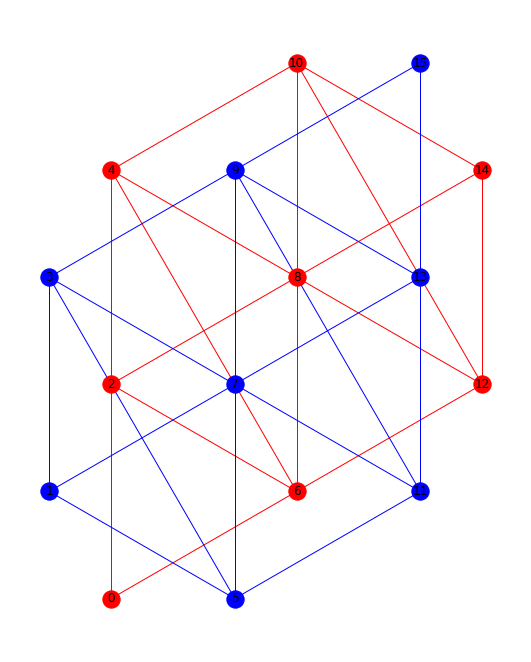

In [51]:
plt.figure(figsize=(16,9))
#nx.draw(G, pos=pos)
nx.draw(NN_1, pos=pos1, edge_color='r', node_color='r')
nx.draw(NN_2, pos=pos2, edge_color='b', node_color='b')
nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.axis('scaled');
plt.tight_layout()
plt.axis("off")

In [46]:
NN_1.edges

EdgeView([((0, 0), (0, 2)), ((0, 0), (0, 4)), ((0, 0), (1, 1)), ((0, 2), (0, 4)), ((0, 2), (1, 1)), ((0, 2), (1, 3)), ((0, 4), (1, 1)), ((0, 4), (1, 3)), ((0, 4), (1, 5)), ((1, 1), (1, 3)), ((1, 1), (1, 5)), ((1, 1), (2, 2)), ((1, 3), (1, 5)), ((1, 3), (2, 2)), ((1, 3), (2, 4)), ((1, 5), (2, 2)), ((1, 5), (2, 4)), ((2, 2), (2, 4))])

In [50]:
NN_1.edges()

EdgeView([((0, 0), (0, 2)), ((0, 0), (0, 4)), ((0, 0), (1, 1)), ((0, 2), (0, 4)), ((0, 2), (1, 1)), ((0, 2), (1, 3)), ((0, 4), (1, 1)), ((0, 4), (1, 3)), ((0, 4), (1, 5)), ((1, 1), (1, 3)), ((1, 1), (1, 5)), ((1, 1), (2, 2)), ((1, 3), (1, 5)), ((1, 3), (2, 2)), ((1, 3), (2, 4)), ((1, 5), (2, 2)), ((1, 5), (2, 4)), ((2, 2), (2, 4))])